In [1]:
#import the necessary packages
import matplotlib.pyplot as plt
import os
import numpy as np
import mne
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

## Read some raw data

In [2]:
#EDF file
original_data_folder = Path('/Volumes/Macintosh HD - Data/Master Thesis/chb-mit-scalp-eeg-database-1.0.0')
Patient = ['chb04','chb06','chb08','chb15','chb17','chb19']
raw_file = os.path.join(original_data_folder,Patient[0],'{}_{}.edf'.format(Patient[0],'01'))

#Read in raw data
raw = mne.io.read_raw_edf(raw_file,preload=True)

raw

Extracting EDF parameters from /Volumes/Macintosh HD - Data/Master Thesis/chb-mit-scalp-eeg-database-1.0.0/chb04/chb04_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3685887  =      0.000 ... 14397.996 secs...


<RawEDF | chb04_01.edf, 23 x 3685888 (14398.0 s), ~646.8 MB, data loaded>

In [3]:
#Get the metadata included in the file and a list of all channels:
info = raw.info

channels = raw.ch_names

In [4]:
raw_data = raw.get_data(return_times=True)

In [5]:
len(raw_data[0])

23

## FFT

Effective window size : 1.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


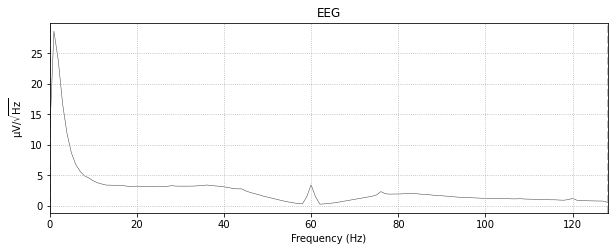

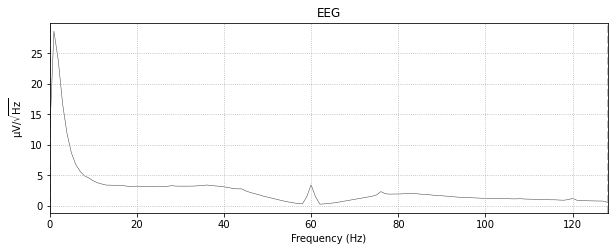

In [34]:
raw.plot_psd(picks=channels[0],n_overlap=128,n_fft=256,dB=False)

In [16]:
#for i in range(len(raw_data[0])):
#    psd,freqs = mne.time_frequency.psd_array_welch(raw_data[0][i],sfreq=raw.info['sfreq'],
#                                                   n_fft=256,n_overlap=128,average=None)
#    plt.figure(figsize=(16, 8))
#    plt.plot(freqs,np.sqrt(psd))
#    plt.xlabel('Frequency(Hz)')
#    plt.ylabel(r'$\mu$V/$\sqrt{Hz}$')
#    plt.title('{}_{} {} Channel FFT'.format(Patient[0],'01',channels[i]))
#    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
#   plt.grid(True)
#   plt.savefig('ch04_01/{}_{} Channel {} Welch FFT.png'.format(Patient[0],'01',channels[i]))

In [31]:
#for i in range(len(raw_data[0])):
#    psd,freqs = mne.time_frequency.psd_array_welch(raw_data[0][i],sfreq=raw.info['sfreq'],
#                                                   n_fft=256,n_overlap=128)
#    plt.figure(figsize=(16, 8))
#    plt.plot(freqs,np.sqrt(psd))
#    plt.xlabel('Frequency(Hz)')
#    plt.ylabel(r'$\mu$V/$\sqrt{Hz}$')
#    plt.title('{}_{} {} Channel Welch FFT'.format(Patient[0],'01',channels[i]))
#    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
#    plt.grid(True)
#    plt.savefig('ch04_01/{}_{} Channel {} mean Welch FFT.png'.format(Patient[0],'01',channels[i]))

In [35]:
psd,freqs = mne.time_frequency.psd_array_welch(raw_data[0][0],sfreq=raw.info['sfreq'], n_fft=256,n_overlap=128,average=None)

Effective window size : 1.000 (s)


In [36]:
psd.shape

(129, 28795)